In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

### training information

In [2]:
labels = ["buildings", "forest", "mountain", "sea"]
training_images = np.zeros(shape=(10669, 32,32,3))
training_labels = np.zeros(shape=(10669,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'training',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'training/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        training_images[idx,:] = np.array(im)
        training_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [3]:
training_images.shape

(10669, 32, 32, 3)

In [4]:
training_images[0].shape

(32, 32, 3)

### validation information

In [5]:
labels = ["buildings", "forest","mountain", "sea"]
valid_images = np.zeros(shape=(1226, 32,32,3))
valid_labels = np.zeros(shape=(1226,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'validation',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'validation/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        valid_images[idx,:] = np.array(im)
        valid_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

### testing information

In [6]:
labels = ["buildings", "forest","mountain", "sea"]
testing_images = np.zeros(shape=(960, 32,32,3))
testing_labels = np.zeros(shape=(960,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'testing',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'testing/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        testing_images[idx,:] = np.array(im)
        testing_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers. Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [8]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
hist = model.fit(training_images, training_labels, epochs=20, validation_data=(valid_images, valid_labels))

Epoch 1/20
334/334 [==============================] - 9s 27ms/step - loss: 1.4387 - accuracy: 0.5749 - val_loss: 0.6964 - val_accuracy: 0.7178
Epoch 2/20
334/334 [==============================] - 12s 37ms/step - loss: 0.6932 - accuracy: 0.7175 - val_loss: 0.6192 - val_accuracy: 0.7635
Epoch 3/20
334/334 [==============================] - 12s 36ms/step - loss: 0.5599 - accuracy: 0.7804 - val_loss: 0.6186 - val_accuracy: 0.7569
Epoch 4/20
334/334 [==============================] - 11s 33ms/step - loss: 0.4996 - accuracy: 0.8069 - val_loss: 0.4591 - val_accuracy: 0.8254
Epoch 5/20
334/334 [==============================] - 11s 32ms/step - loss: 0.4505 - accuracy: 0.8261 - val_loss: 0.4085 - val_accuracy: 0.8409
Epoch 6/20
334/334 [==============================] - 11s 34ms/step - loss: 0.4190 - accuracy: 0.8415 - val_loss: 0.3979 - val_accuracy: 0.8573
Epoch 7/20
334/334 [==============================] - 10s 30ms/step - loss: 0.3763 - accuracy: 0.8584 - val_loss: 0.3411 - val_accuracy: 

In [10]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print('Loss =', loss)
print(f'Accuracy = {accuracy*100} %')

30/30 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.9323
Loss = 0.2655697762966156
Accuracy = 93.22916865348816 %


In [11]:
model.save('result.model')

INFO:tensorflow:Assets written to: result.model\assets


### visualization

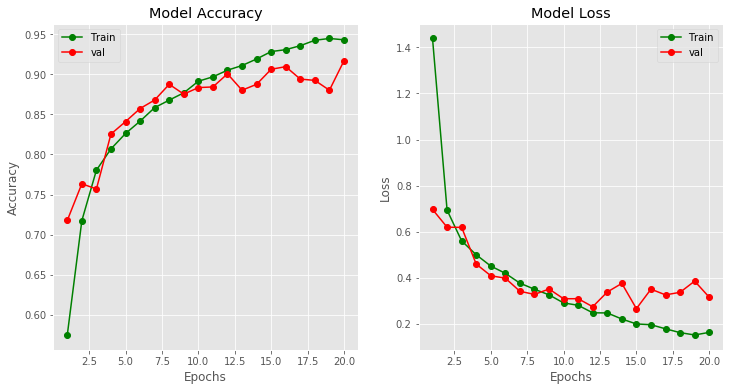

In [12]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")
epochs = range(1,21)
plt.subplot(1,2,1)
plt.plot(epochs,hist.history["accuracy"],"go-")
plt.plot(epochs,hist.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs,hist.history["loss"],"go-")
plt.plot(epochs,hist.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc="upper right")
plt.show()